In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing dataset of Breast Cancer Wisconsin (Diagnostic) 

In [10]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd#importing our cancer dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast_cancer/data.csv')


In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv1D,MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])
 
df['diagnosis'].unique()

array([1, 0])

In [15]:
y=df['diagnosis']
X = df.drop(columns=['diagnosis','id','Unnamed: 32'],axis=1)

In [16]:
print(X.shape,y.shape)

(569, 30) (569,)


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


## As a CNN accepts only 3Dimensional data , we have to convert both X_train,X_test into 3D layers


In [20]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [21]:
X_train

array([[[-1.44075296],
        [-0.43531947],
        [-1.36208497],
        ...,
        [ 0.9320124 ],
        [ 2.09724217],
        [ 1.88645014]],

       [[ 1.97409619],
        [ 1.73302577],
        [ 2.09167167],
        ...,
        [ 2.6989469 ],
        [ 1.89116053],
        [ 2.49783848]],

       [[-1.39998202],
        [-1.24962228],
        [-1.34520926],
        ...,
        [-0.97023893],
        [ 0.59760192],
        [ 0.0578942 ]],

       ...,

       [[ 0.04880192],
        [-0.55500086],
        [-0.06512547],
        ...,
        [-1.23903365],
        [-0.70863864],
        [-1.27145475]],

       [[-0.03896885],
        [ 0.10207345],
        [-0.03137406],
        ...,
        [ 1.05001236],
        [ 0.43432185],
        [ 1.21336207]],

       [[-0.54860557],
        [ 0.31327591],
        [-0.60350155],
        ...,
        [-0.61102866],
        [-0.3345212 ],
        [-0.84628745]]])

In [23]:
epochs = 50

model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_2 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 28, 64)           

In [25]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
15/15 [==============================] - 4s 50ms/step - loss: 1.6799 - accuracy: 0.4484 - val_loss: 0.6634 - val_accuracy: 0.5614
Epoch 2/50
15/15 [==============================] - 0s 18ms/step - loss: 1.2890 - accuracy: 0.5143 - val_loss: 0.6151 - val_accuracy: 0.8333
Epoch 3/50
15/15 [==============================] - 0s 17ms/step - loss: 1.0300 - accuracy: 0.5890 - val_loss: 0.5676 - val_accuracy: 0.9386
Epoch 4/50
15/15 [==============================] - 0s 16ms/step - loss: 0.7719 - accuracy: 0.6901 - val_loss: 0.5214 - val_accuracy: 0.9298
Epoch 5/50
15/15 [==============================] - 0s 18ms/step - loss: 0.7206 - accuracy: 0.7231 - val_loss: 0.4797 - val_accuracy: 0.9123
Epoch 6/50
15/15 [==============================] - 0s 17ms/step - loss: 0.6262 - accuracy: 0.7626 - val_loss: 0.4406 - val_accuracy: 0.8860
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 0.5548 - accuracy: 0.7890 - val_loss: 0.4060 - val_accuracy: 0.8772
Epoch 8/50
15

In [27]:
def plot_learning(history,epoch):
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()



*   If validation accuracy is greater than Training accuracy it means the model isn't overfitting
*   unless and untill validation loss goes above the Training loss we can keep on Training our model



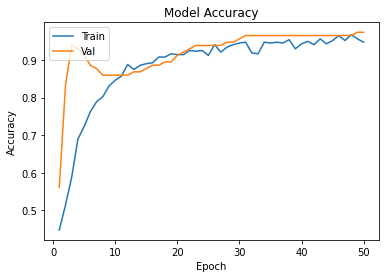

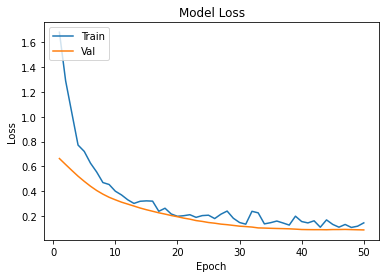

In [28]:
plot_learning(history,epochs)


In [29]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [30]:
y_pred

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9736842105263158

## The model accuracy is 97% 

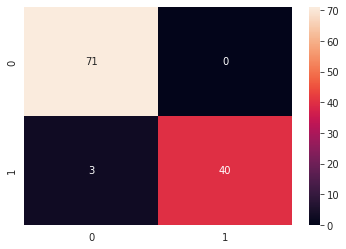

In [32]:
import seaborn as sns
sns.set_style("white")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)